# Personal Information
Name: **Wouter Knibbe**

StudentID: **12795526**

Email: [**wouter.knibbe@student.uva.nl**](wouter.knibbe@student.uva.nl)

Github **https://github.com/WouterKnibbe/ATSP_hillForHard**

Submitted on: **05.03.2024**

In [1]:
import json
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import algorithm
import seaborn as sns
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score, mean_squared_error
from matplotlib.animation import FuncAnimation
from PIL import Image

In [2]:
def mutate_matrix(_matrix, _upper, _print):
    matrix = _matrix.copy()
    number1, number2 = 0, 0

    while number1 == number2:
        number1, number2 = np.random.randint(0,matrix.shape[0]), np.random.randint(0,matrix.shape[0])
    previous_number = matrix[number1,number2]
    while matrix[number1,number2] == previous_number:
        matrix[number1,number2] = np.random.randint(1,_upper)
    if _print:
        print(_matrix[number1,number2].round(1), "at", (number1,number2), "becomes", matrix[number1,number2].round(1))

    return matrix

In [3]:
def custom_encoder(obj):
    """
    Custom JSON encoder function that converts non-serializable objects.
    Converts:
    - numpy arrays to lists
    - numpy int64 to int
    - numpy float64 to float
    """
    if isinstance(obj, np.ndarray):
        return obj.tolist()
    elif isinstance(obj, np.integer):
        return int(obj)
    elif isinstance(obj, np.floating):
        return float(obj)
    elif isinstance(obj, np.inf):
        return "np.inf"
    else:
        # This will raise a TypeError for unknown types
        raise TypeError(f"Object of type '{obj.__class__.__name__}' is not JSON serializable")

def save_merged(results, citysize, range):

    x = 0
    while True:
        file_path = f"Results/results{citysize}_{range}_m.json"
        if not os.path.exists(file_path):
            break
        x += 1

    # Dumping the nested_dict to a json file with custom encoding
    with open(file_path, "w") as json_file:
        json.dump(results, json_file, default=custom_encoder)

    print(f"Results saved to JSON file successfully as {file_path}")

In [4]:
def custom_decoder(obj):
    """
    Custom decoder function that converts specific JSON values back to their original types.
    Converts:
    - 'Infinity' to np.inf
    """
    if isinstance(obj, dict):
        for key, value in obj.items():
            if value == "Infinity":
                obj[key] = np.inf
            # elif isinstance(value, list):
                # Convert lists back to arrays
                # obj[key] = np.array(value)
            elif isinstance(value, dict):
                obj[key] = custom_decoder(value)
    elif isinstance(obj, list):
        for i, value in enumerate(obj):
            if value == "Infinity":
                obj[i] = np.inf
            # elif isinstance(value, list):
                # obj[i] = np.array(value)
            elif isinstance(value, dict):
                obj[i] = custom_decoder(value)
    return obj

def load_result(file_path):

  # Loading the JSON file with custom decoding
  with open(file_path, "r") as json_file:
      loaded_results = json.load(json_file, object_hook=custom_decoder)

  return loaded_results

In [5]:
def find_hardest_matrix2(loaded):
    # Find the maximum hardness value
    max_hardness = list(loaded[-1][1].values())[-1][1]
    
    # Initialize the hardest matrix
    hardest_matrix = None
    
    # Traverse through the data in reverse order
    for i in range(len(loaded) - 1, -1, -1):
        values_list = list(loaded[i][1].values())
        for j in range(len(values_list) - 1, -1, -1):
            # Check if the current hardness is equal to the maximum hardness
            if values_list[j][0] == max_hardness:
                # Assign the hardest matrix value
                hardest_matrix = values_list[j][4]
                return max_hardness, hardest_matrix
    
    return max_hardness, hardest_matrix

### Combine files

In [6]:
# import re

# cities = [30, 50]
# ranges = [15, 20]

# for city in cities:
#     for range_val in ranges:
#         # Construct the directory path
#         directory_path = f"Results"
        
#         # Get all files in the directory
#         files = os.listdir(directory_path)
        
#         # Filter files based on the pattern: results{city}_{range}_x.json where x is any number
#         pattern = re.compile(rf'^results{city}_{range_val}_\d+\.json$')
#         json_files = [file for file in files if pattern.match(file)]

#         # Proceed if there are any matching files
#         if json_files and len(json_files) > 1:
#             # Sort files to maintain order, assuming numeric sorting is desired
#             json_files.sort(key=lambda x: int(x.split('_')[-1].split('.')[0]))

#             # Load the initial dictionary from the first file
#             base_dict = load_result(os.path.join(directory_path, json_files[0]))
#             last_key = max([int(k) for k in base_dict.keys()], default=0)

#             # Merge the remaining dictionaries
#             for file in json_files[1:]:  # Skip the first file as it's already loaded
#                 current_dict = load_result(os.path.join(directory_path, file))
#                 adjusted_dict = {str(int(key) + last_key): value for key, value in current_dict.items()}
#                 base_dict.update(adjusted_dict)
#                 last_key = max([int(k) for k in base_dict.keys()])

#             # Save the merged dictionary
#             save_merged(base_dict, city, range_val)

In [7]:
# import os
# import numpy as np
# import matplotlib.pyplot as plt

# # Mock data generation function
# def generate_mock_data(num_points):
#     return np.linspace(0, 1000, num_points), np.random.rand(num_points)

# # Define the parameters
# cities = [30, 50, 70]
# ranges = [10, 15, 20, 25, 30, 35, 40, 45, 50]
# results_path = 'Results/'
# runs = [name for name in os.listdir(results_path) if os.path.isdir(os.path.join(results_path, name))]
# runs = runs[:5]

# subplot_rows = len(cities)
# subplot_cols = len(ranges)

# fig, axs = plt.subplots(subplot_rows, subplot_cols, figsize=(36, 15))

# for i, city in enumerate(cities):
#     for j, range_val in enumerate(ranges):
#         times = []
#         max_x_values = 0

#         # Loop over each run
#         for run in runs:
#             base_path = f"{results_path}/{run}/results{city}_{range_val}.json"

#             # Mock data loading
#             x_values, y_values = generate_mock_data(200)

#             # Update times mock
#             times.append(np.random.uniform(1, 12))

#             # Collect maximum x values for axis limit setting
#             if x_values[-1] > max_x_values:
#                 max_x_values = x_values[-1]

#             ax = axs[i, j]
#             ax.plot(x_values, y_values, label=f'{run}')  # Plot each run's data

#         # Set X ticks and labels
#         ax.set_xticks(np.linspace(0, max_x_values, num=11))
#         ax.set_xticklabels([f"{int(x // 100)}" for x in np.linspace(0, max_x_values, num=11)])

#         # Calculate and display statistics in the title
#         min_time, mean_time, max_time, std_time = np.min(times), np.mean(times), np.max(times), np.std(times)
#         ax.set_title(f'WCT min={min_time:.2f}h, mean={mean_time:.2f}h,\nmax={max_time:.2f}h, std={std_time:.2f}h')

#         # Set labels
#         if j == 0:
#             ax.set_ylabel('Iterations')
#         if i == subplot_rows - 1:
#             ax.set_xlabel('Generations (in hundreds)')

#         if (i, j) in [(0, 0), (1, 2), (2, 4)]:
#             ax.legend()

# # Add row and column labels
# for idx, city in enumerate(cities):
#     fig.text(0, 0.79 - idx * 0.31, f'City Size: {city}', va='center', ha='left', rotation='vertical', fontsize=12)

# for idx, range_val in enumerate(ranges):
#     fig.text(0.097 + idx * 0.106, 0.95, f'Range: {range_val}', ha='center', va='top', fontsize=12)

# plt.tight_layout(rect=[0.03, 0, 1, 0.95])
# plt.show()

In [8]:
# Define the parameters
cities = [30, 50, 70]
ranges = [10, 15, 20, 25, 30, 35, 40, 45, 50]
results_path = 'Results/'

# Initialize a dictionary to store the counts
count_runs = {city: {range_val: 0 for range_val in ranges} for city in cities}

# Get a list of all run directories
runs = [name for name in os.listdir(results_path) if os.path.isdir(os.path.join(results_path, name))]

# Count the runs for each city and range
for run in runs:
    for city in cities:
        for range_val in ranges:
            # Construct the base path for checking files
            base_path = os.path.join(results_path, run, f'results{city}_{range_val}.json')
            
            # Check if the base file exists
            if os.path.exists(base_path):
                count_runs[city][range_val] += 1

lowest = 100
# Print the results
for city in cities:
    for range_val in ranges:
        current = count_runs[city][range_val]
        if current < lowest:
            lowest = current
        print(f"City: {city}, Range: {range_val}, Count: {count_runs[city][range_val]}")
print("Lowest:",lowest)

City: 30, Range: 10, Count: 49
City: 30, Range: 15, Count: 49
City: 30, Range: 20, Count: 49
City: 30, Range: 25, Count: 49
City: 30, Range: 30, Count: 49
City: 30, Range: 35, Count: 48
City: 30, Range: 40, Count: 48
City: 30, Range: 45, Count: 48
City: 30, Range: 50, Count: 48
City: 50, Range: 10, Count: 49
City: 50, Range: 15, Count: 49
City: 50, Range: 20, Count: 49
City: 50, Range: 25, Count: 49
City: 50, Range: 30, Count: 48
City: 50, Range: 35, Count: 48
City: 50, Range: 40, Count: 47
City: 50, Range: 45, Count: 48
City: 50, Range: 50, Count: 48
City: 70, Range: 10, Count: 49
City: 70, Range: 15, Count: 49
City: 70, Range: 20, Count: 49
City: 70, Range: 25, Count: 49
City: 70, Range: 30, Count: 48
City: 70, Range: 35, Count: 54
City: 70, Range: 40, Count: 51
City: 70, Range: 45, Count: 51
City: 70, Range: 50, Count: 43
Lowest: 43


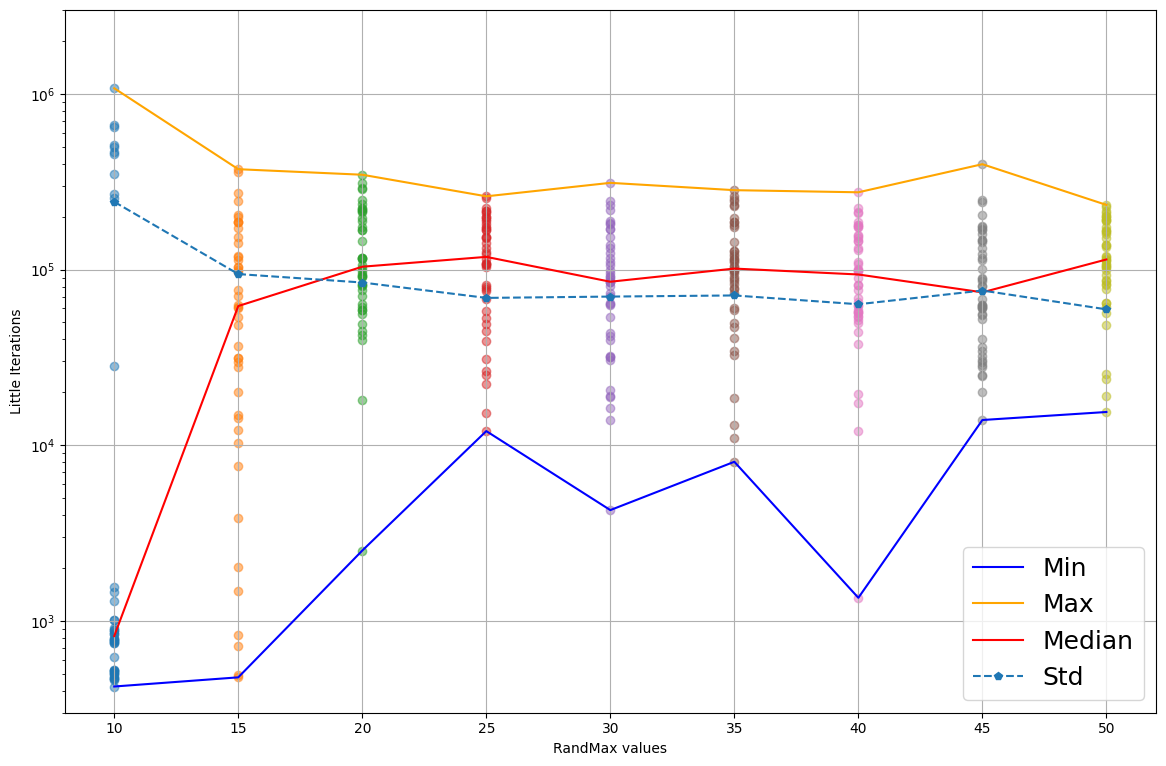

In [9]:
# Define the path to the JSON file
input_file_path = 'last_y_values_30.json'

# Read the data from the JSON file
with open(input_file_path, 'r') as file:
    all_data = json.load(file)

fig, ax = plt.subplots(figsize=(12, 8))
plt.rcdefaults()
plt.rcParams.update({'font.size': 18})

global_min = 300 # Adjusted to avoid log(0)
global_max = 3000000

min_vals = []
max_vals = []
median_vals = []
mean_vals = []
stdl = []

# Plotting
for range_val, values in all_data.items():
    if values:
        range_val = int(range_val)
        x = [range_val] * len(values)
        ax.scatter(x, values, alpha=0.5, label='Data Points' if range_val == list(all_data.keys())[0] else "")
        
        # Statistics
        stats = np.array(values)
        min_val = np.min(stats)
        max_val = np.max(stats)
        median_val = np.median(stats)
        mean_val = np.mean(stats)
        std_val = np.std(stats)
        
        min_vals.append((range_val, min_val))
        max_vals.append((range_val, max_val))
        median_vals.append((range_val, median_val))
        mean_vals.append((range_val, mean_val))
        stdl.append((range_val, std_val))
        
        # Annotation if max value exceeds global_max
        if max_val > global_max:
            ax.text(range_val+1.5, global_max-25, f'^{int(max_val)}', ha='center', color='orange')

# Plotting statistics as lines across the graph
min_vals_x, min_vals_y = zip(*min_vals)
max_vals_x, max_vals_y = zip(*max_vals)
median_vals_x, median_vals_y = zip(*median_vals)
mean_vals_x, mean_vals_y = zip(*mean_vals)
std_vals_x, std_vals_y = zip(*stdl)

ax.plot(min_vals_x, min_vals_y, 'b-', label='Min')
ax.plot(max_vals_x, max_vals_y, 'orange', label='Max')
ax.plot(median_vals_x, median_vals_y, 'r-', label='Median')
# ax.plot(mean_vals_x, mean_vals_y, 'g--', label='Mean')
ax.plot(std_vals_x, std_vals_y, 'p--', label='Std')

# Set logarithmic scale
ax.set_yscale('log')

ax.set_xlabel('RandMax values')
ax.set_ylabel('Little Iterations')
ax.set_xticks([int(key) for key in all_data.keys()])
ax.set_xticklabels([int(key) for key in all_data.keys()])
ax.set_ylim(global_min, global_max)
plt.grid(True)

# Adding legend to the plot
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))  # removing duplicate labels

plt.tight_layout()
plt.legend(by_label.values(), by_label.keys())
plt.show()

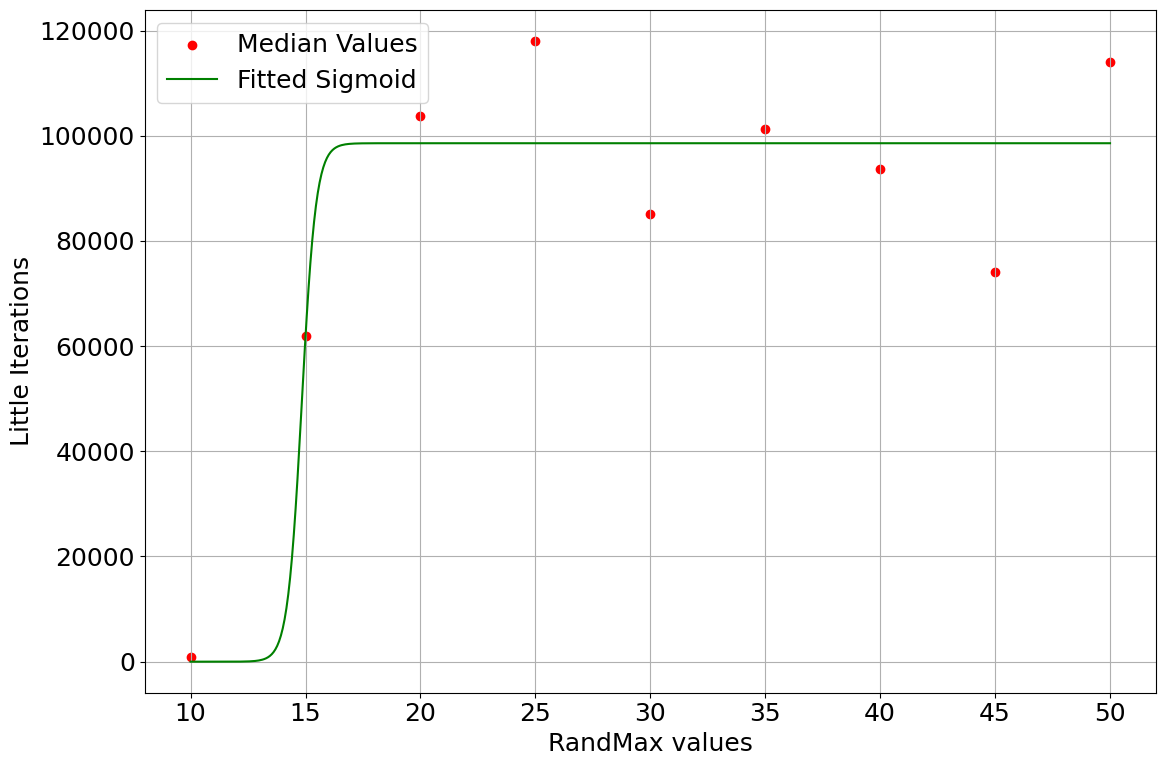

(98576.21486077644,
 14.837330657119399,
 3.230178084164698,
 0.8596375451159743,
 15.183596600593017)

In [10]:
# Define the sigmoid function
def sigmoid(x, L, x0, k):
    return L / (1 + np.exp(-k * (x - x0)))

# Extract median values from the data
median_vals_x, median_vals_y = zip(*median_vals)

# Initial guess for the parameters L, x0, and k
initial_guess = [max(median_vals_y), np.median(median_vals_x), 1]

# Perform curve fitting
popt, pcov = curve_fit(sigmoid, median_vals_x, median_vals_y, p0=initial_guess)

# Extract the optimal parameters
L_opt, x0_opt, k_opt = popt

# Generate x values for plotting the fitted sigmoid curve
x_values = np.linspace(min(median_vals_x), max(median_vals_x), 500)
fitted_sigmoid = sigmoid(x_values, *popt)

# Calculate predicted values using the sigmoid function
predicted_median_vals_y = sigmoid(median_vals_x, *popt)

# Calculate R-squared value
r_squared = r2_score(median_vals_y, predicted_median_vals_y)

# Calculate RMSE
rmse = (np.sqrt(mean_squared_error(median_vals_y, predicted_median_vals_y))/np.mean(median_vals_y))*100

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))
plt.rcdefaults()
plt.rcParams.update({'font.size': 18})

# Plot original median values
ax.scatter(median_vals_x, median_vals_y, color='r', label='Median Values')

# Plot fitted sigmoid curve
ax.plot(x_values, fitted_sigmoid, label='Fitted Sigmoid', color='g')

# Set logarithmic scale
# ax.set_yscale('log')

ax.set_xlabel('RandMax values')
ax.set_ylabel('Little Iterations')
ax.set_xticks([int(key) for key in all_data.keys()])
ax.set_xticklabels([int(key) for key in all_data.keys()])
# ax.set_ylim(global_min, global_max)
plt.grid(True)

# Adding legend to the plot
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))  # removing duplicate labels

plt.tight_layout()
plt.legend(by_label.values(), by_label.keys())
plt.show()

# Display the fitted sigmoid parameters and goodness of fit metrics
L_opt, x0_opt, k_opt, r_squared, rmse

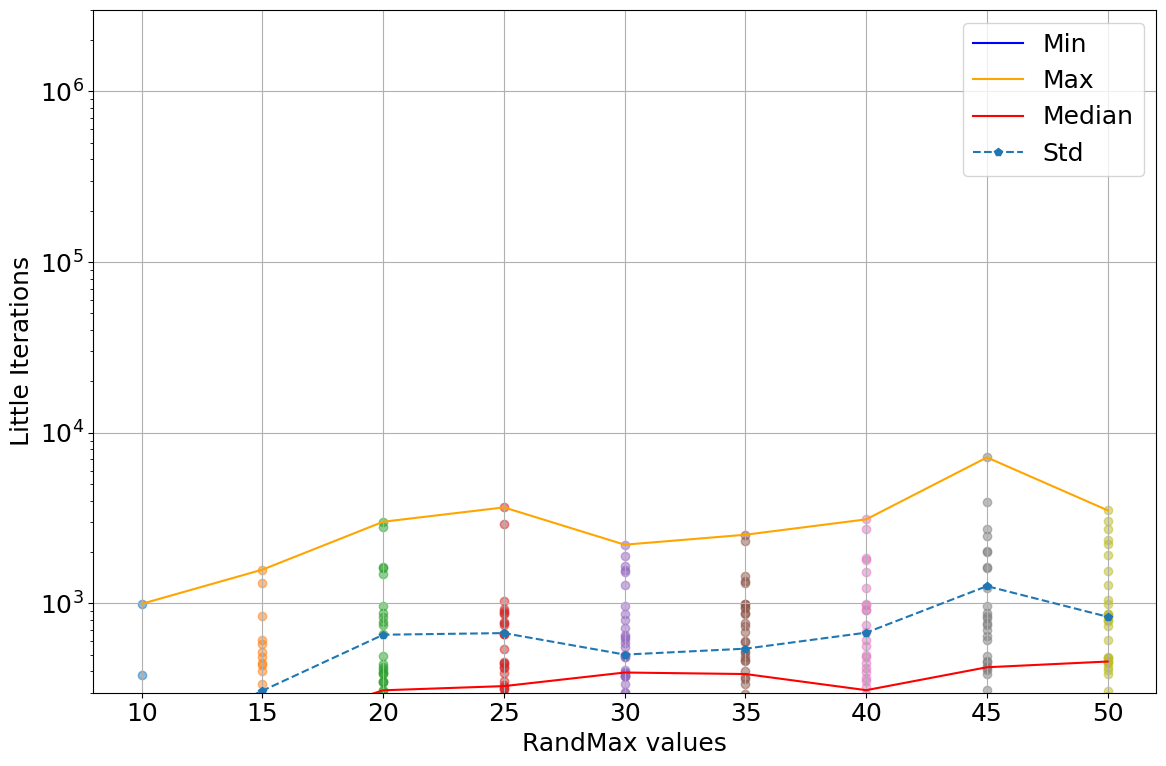

In [63]:
# Define the path to the JSON file
input_file_path = 'easy_y_values_wstd_30.json'

# Read the data from the JSON file
with open(input_file_path, 'r') as file:
    all_data = json.load(file)

fig, ax = plt.subplots(figsize=(12, 8))

global_min = 300  # Adjusted to avoid log(0)
global_max = 3000000

min_vals = []
max_vals = []
median_vals = []
mean_vals = []
stdl = []

# Plotting
for range_val, values in all_data.items():
    values = values[0]
    if values:
        range_val = int(range_val)
        x = [range_val] * len(values)
        ax.scatter(x, values, alpha=0.5, label='Data Points' if range_val == list(all_data.keys())[0] else "")
        
        # Statistics
        stats = np.array(values)
        min_val = np.min(stats)
        max_val = np.max(stats)
        median_val = np.median(stats)
        mean_val = np.mean(stats)
        std_val = np.std(stats)
        
        min_vals.append((range_val, min_val))
        max_vals.append((range_val, max_val))
        median_vals.append((range_val, median_val))
        mean_vals.append((range_val, mean_val))
        stdl.append((range_val, std_val))
        
        # Annotation if max value exceeds global_max
        if max_val > global_max:
            ax.text(range_val+1.5, global_max-25, f'^{int(max_val)}', ha='center', color='orange')

# Plotting statistics as lines across the graph
min_vals_x, min_vals_y = zip(*min_vals)
max_vals_x, max_vals_y = zip(*max_vals)
median_vals_x, median_vals_y = zip(*median_vals)
mean_vals_x, mean_vals_y = zip(*mean_vals)
std_vals_x, std_vals_y = zip(*stdl)

ax.plot(min_vals_x, min_vals_y, 'b-', label='Min')
ax.plot(max_vals_x, max_vals_y, 'orange', label='Max')
ax.plot(median_vals_x, median_vals_y, 'r-', label='Median')
# ax.plot(mean_vals_x, mean_vals_y, 'g--', label='Mean')
ax.plot(std_vals_x, std_vals_y, 'p--', label='Std')

# Set logarithmic scale
ax.set_yscale('log')

ax.set_xlabel('RandMax values')
ax.set_ylabel('Little Iterations')
ax.set_xticks([int(key) for key in all_data.keys()])
ax.set_xticklabels([int(key) for key in all_data.keys()])
ax.set_ylim(global_min, global_max)
plt.grid(True)

# Adding legend to the plot
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))  # removing duplicate labels

plt.tight_layout()
plt.legend(by_label.values(), by_label.keys())
plt.show()

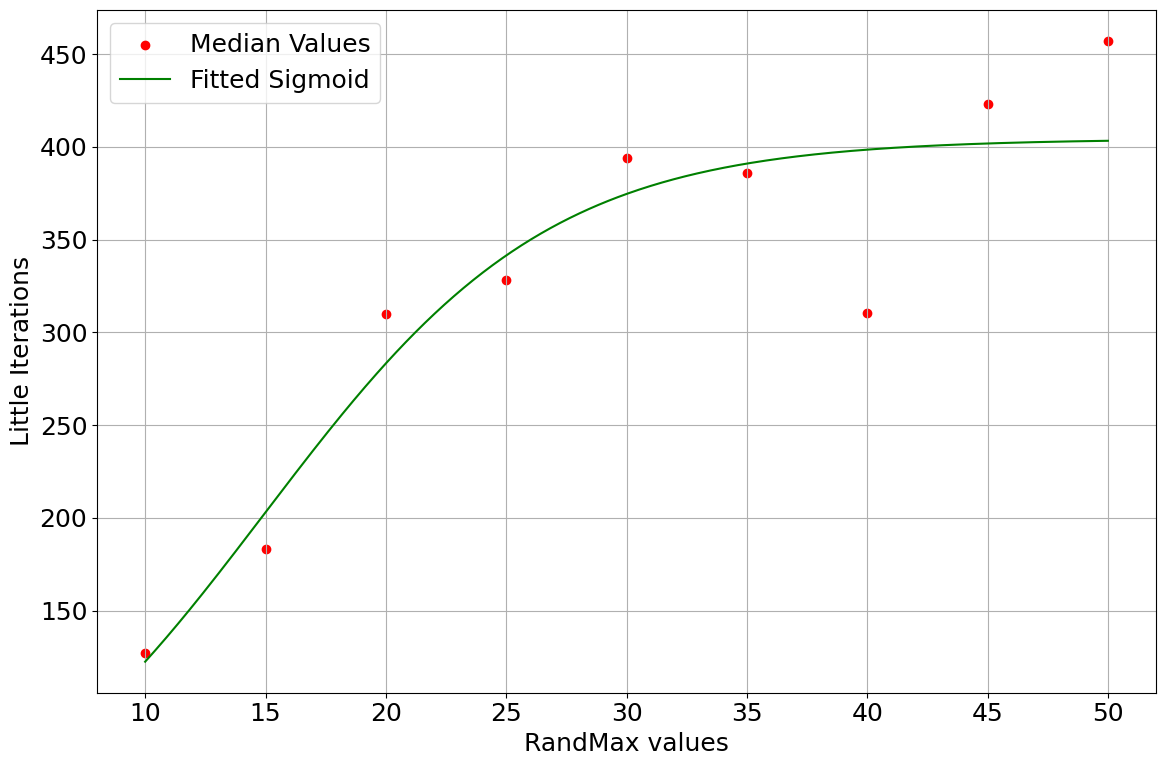

(404.3433926061476,
 14.952441644260201,
 0.1682917332904159,
 0.8657601160481369,
 11.627565354395438)

In [64]:
# Define the sigmoid function
def sigmoid(x, L, x0, k):
    return L / (1 + np.exp(-k * (x - x0)))

# Extract median values from the data
median_vals_x, median_vals_y = zip(*median_vals)

# Initial guess for the parameters L, x0, and k
initial_guess = [max(median_vals_y), np.median(median_vals_x), 1]

# Perform curve fitting
popt, pcov = curve_fit(sigmoid, median_vals_x, median_vals_y, p0=initial_guess)

# Extract the optimal parameters
L_opt, x0_opt, k_opt = popt

# Generate x values for plotting the fitted sigmoid curve
x_values = np.linspace(min(median_vals_x), max(median_vals_x), 500)
fitted_sigmoid = sigmoid(x_values, *popt)

# Calculate predicted values using the sigmoid function
predicted_median_vals_y = sigmoid(median_vals_x, *popt)

# Calculate R-squared value
r_squared = r2_score(median_vals_y, predicted_median_vals_y)

# Calculate RMSE
rmse = (np.sqrt(mean_squared_error(median_vals_y, predicted_median_vals_y))/np.mean(median_vals_y))*100

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))
plt.rcdefaults()
plt.rcParams.update({'font.size': 18})

# Plot original median values
ax.scatter(median_vals_x, median_vals_y, color='r', label='Median Values')

# Plot fitted sigmoid curve
ax.plot(x_values, fitted_sigmoid, label='Fitted Sigmoid', color='g')

# Set logarithmic scale
# ax.set_yscale('log')

ax.set_xlabel('RandMax values')
ax.set_ylabel('Little Iterations')
ax.set_xticks([int(key) for key in all_data.keys()])
ax.set_xticklabels([int(key) for key in all_data.keys()])
# ax.set_ylim(global_min, global_max)
plt.grid(True)

# Adding legend to the plot
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))  # removing duplicate labels

plt.tight_layout()
plt.legend(by_label.values(), by_label.keys())
plt.show()

# Display the fitted sigmoid parameters and goodness of fit metrics
L_opt, x0_opt, k_opt, r_squared, rmse

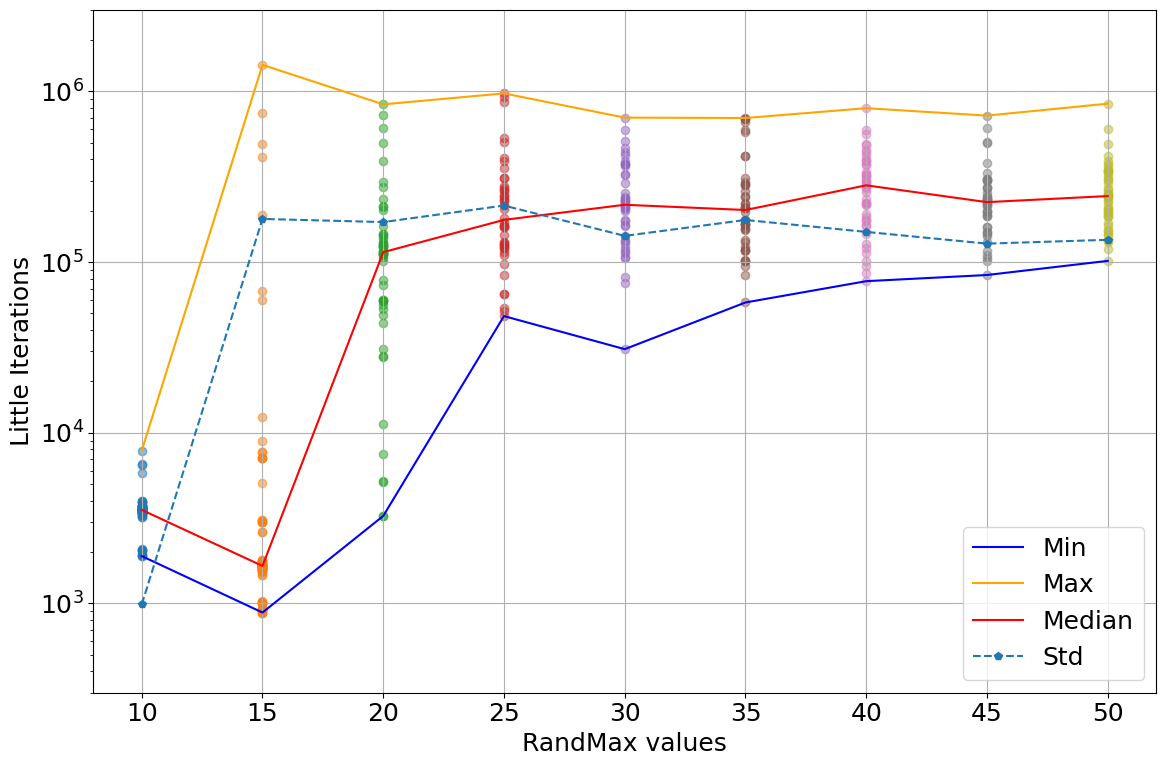

In [65]:
# Define the path to the JSON file
input_file_path = 'last_y_values_50.json'

# Read the data from the JSON file
with open(input_file_path, 'r') as file:
    all_data = json.load(file)

fig, ax = plt.subplots(figsize=(12, 8))

global_min = 300  # Adjusted to avoid log(0)
global_max = 3000000

min_vals = []
max_vals = []
median_vals = []
mean_vals = []
stdl = []

# Plotting
for range_val, values in all_data.items():
    if values:
        range_val = int(range_val)
        x = [range_val] * len(values)
        ax.scatter(x, values, alpha=0.5, label='Data Points' if range_val == list(all_data.keys())[0] else "")
        
        # Statistics
        stats = np.array(values)
        min_val = np.min(stats)
        max_val = np.max(stats)
        median_val = np.median(stats)
        mean_val = np.mean(stats)
        std_val = np.std(stats)
        
        min_vals.append((range_val, min_val))
        max_vals.append((range_val, max_val))
        median_vals.append((range_val, median_val))
        mean_vals.append((range_val, mean_val))
        stdl.append((range_val, std_val))
        
        # Annotation if max value exceeds global_max
        if max_val > global_max:
            ax.text(range_val+1.5, global_max-25, f'^{int(max_val)}', ha='center', color='orange')

# Plotting statistics as lines across the graph
min_vals_x, min_vals_y = zip(*min_vals)
max_vals_x, max_vals_y = zip(*max_vals)
median_vals_x, median_vals_y = zip(*median_vals)
mean_vals_x, mean_vals_y = zip(*mean_vals)
std_vals_x, std_vals_y = zip(*stdl)

ax.plot(min_vals_x, min_vals_y, 'b-', label='Min')
ax.plot(max_vals_x, max_vals_y, 'orange', label='Max')
ax.plot(median_vals_x, median_vals_y, 'r-', label='Median')
# ax.plot(mean_vals_x, mean_vals_y, 'g--', label='Mean')
ax.plot(std_vals_x, std_vals_y, 'p--', label='Std')

# Set logarithmic scale
ax.set_yscale('log')

ax.set_xlabel('RandMax values')
ax.set_ylabel('Little Iterations')
ax.set_xticks([int(key) for key in all_data.keys()])
ax.set_xticklabels([int(key) for key in all_data.keys()])
ax.set_ylim(global_min, global_max)
plt.grid(True)

# Adding legend to the plot
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))  # removing duplicate labels

plt.tight_layout()
plt.legend(by_label.values(), by_label.keys())
plt.show()

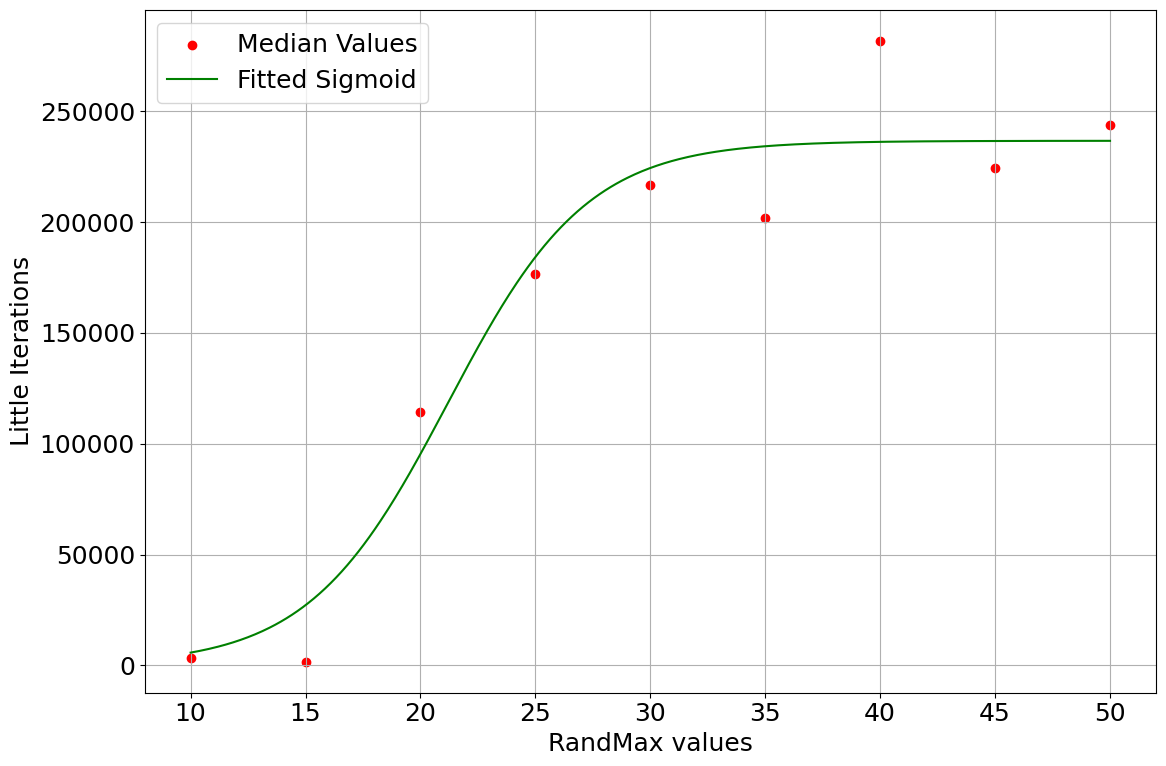

(236736.62970081772,
 21.191049835194228,
 0.3299367717536931,
 0.946431336763273,
 13.639927346139283)

In [66]:
# Define the sigmoid function
def sigmoid(x, L, x0, k):
    return L / (1 + np.exp(-k * (x - x0)))

# Extract median values from the data
median_vals_x, median_vals_y = zip(*median_vals)

# Initial guess for the parameters L, x0, and k
initial_guess = [max(median_vals_y), np.median(median_vals_x), 1]

# Perform curve fitting
popt, pcov = curve_fit(sigmoid, median_vals_x, median_vals_y, p0=initial_guess)

# Extract the optimal parameters
L_opt, x0_opt, k_opt = popt

# Generate x values for plotting the fitted sigmoid curve
x_values = np.linspace(min(median_vals_x), max(median_vals_x), 500)
fitted_sigmoid = sigmoid(x_values, *popt)

# Calculate predicted values using the sigmoid function
predicted_median_vals_y = sigmoid(median_vals_x, *popt)

# Calculate R-squared value
r_squared = r2_score(median_vals_y, predicted_median_vals_y)

# Calculate RMSE
rmse = (np.sqrt(mean_squared_error(median_vals_y, predicted_median_vals_y))/np.mean(median_vals_y))*100

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))
plt.rcdefaults()
plt.rcParams.update({'font.size': 18})

# Plot original median values
ax.scatter(median_vals_x, median_vals_y, color='r', label='Median Values')

# Plot fitted sigmoid curve
ax.plot(x_values, fitted_sigmoid, label='Fitted Sigmoid', color='g')

# Set logarithmic scale
# ax.set_yscale('log')

ax.set_xlabel('RandMax values')
ax.set_ylabel('Little Iterations')
ax.set_xticks([int(key) for key in all_data.keys()])
ax.set_xticklabels([int(key) for key in all_data.keys()])
# ax.set_ylim(global_min, global_max)
plt.grid(True)

# Adding legend to the plot
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))  # removing duplicate labels

plt.tight_layout()
plt.legend(by_label.values(), by_label.keys())
plt.show()

# Display the fitted sigmoid parameters and goodness of fit metrics
L_opt, x0_opt, k_opt, r_squared, rmse

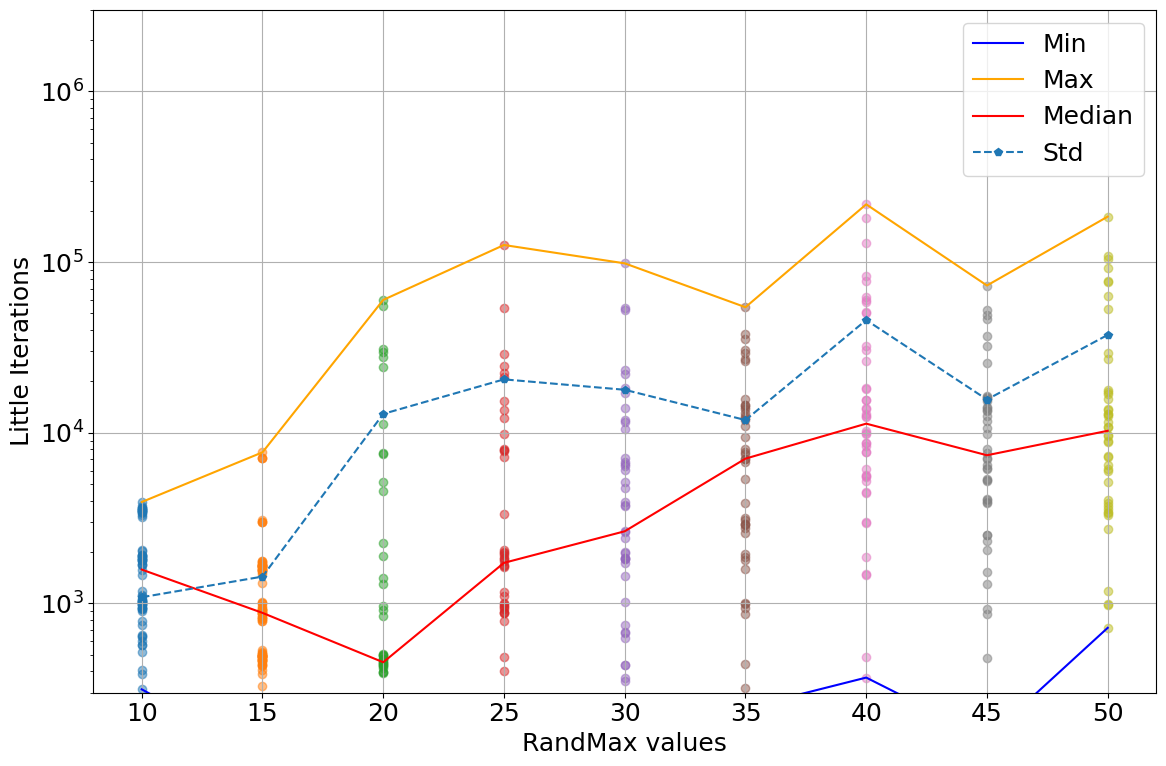

In [67]:
# Define the path to the JSON file
input_file_path = 'easy_y_values_wstd_50.json'

# Read the data from the JSON file
with open(input_file_path, 'r') as file:
    all_data = json.load(file)

fig, ax = plt.subplots(figsize=(12, 8))

global_min = 300  # Adjusted to avoid log(0)
global_max = 3000000

min_vals = []
max_vals = []
median_vals = []
mean_vals = []
stdl = []

# Plotting
for range_val, values in all_data.items():
    values = values[0]
    if values:
        range_val = int(range_val)
        x = [range_val] * len(values)
        ax.scatter(x, values, alpha=0.5, label='Data Points' if range_val == list(all_data.keys())[0] else "")
        
        # Statistics
        stats = np.array(values)
        min_val = np.min(stats)
        max_val = np.max(stats)
        median_val = np.median(stats)
        mean_val = np.mean(stats)
        std_val = np.std(stats)
        
        min_vals.append((range_val, min_val))
        max_vals.append((range_val, max_val))
        median_vals.append((range_val, median_val))
        mean_vals.append((range_val, mean_val))
        stdl.append((range_val, std_val))
        
        # Annotation if max value exceeds global_max
        if max_val > global_max:
            ax.text(range_val+1.5, global_max-25, f'^{int(max_val)}', ha='center', color='orange')

# Plotting statistics as lines across the graph
min_vals_x, min_vals_y = zip(*min_vals)
max_vals_x, max_vals_y = zip(*max_vals)
median_vals_x, median_vals_y = zip(*median_vals)
mean_vals_x, mean_vals_y = zip(*mean_vals)
std_vals_x, std_vals_y = zip(*stdl)

ax.plot(min_vals_x, min_vals_y, 'b-', label='Min')
ax.plot(max_vals_x, max_vals_y, 'orange', label='Max')
ax.plot(median_vals_x, median_vals_y, 'r-', label='Median')
# ax.plot(mean_vals_x, mean_vals_y, 'g--', label='Mean')
ax.plot(std_vals_x, std_vals_y, 'p--', label='Std')

# Set logarithmic scale
ax.set_yscale('log')

ax.set_xlabel('RandMax values')
ax.set_ylabel('Little Iterations')
ax.set_xticks([int(key) for key in all_data.keys()])
ax.set_xticklabels([int(key) for key in all_data.keys()])
ax.set_ylim(global_min, global_max)
plt.grid(True)

# Adding legend to the plot
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))  # removing duplicate labels

plt.tight_layout()
plt.legend(by_label.values(), by_label.keys())
plt.show()

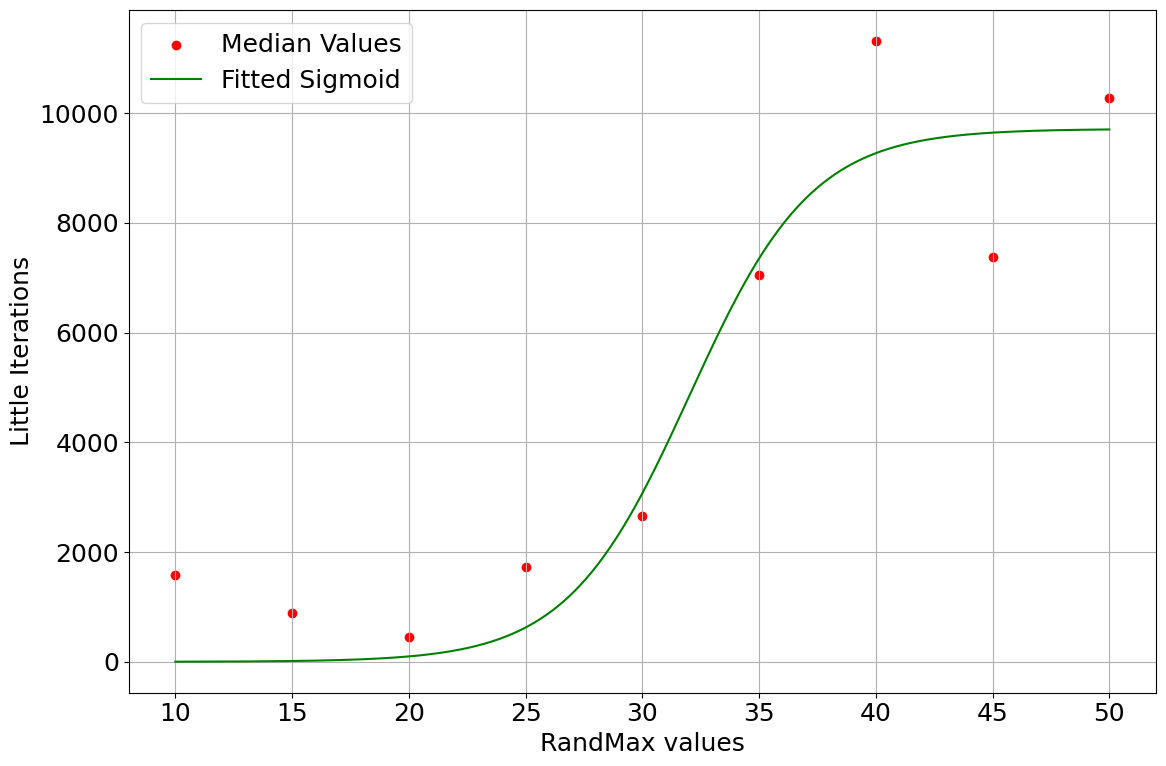

(9712.864361495565,
 32.02207588852756,
 0.38120825828432675,
 0.8988291139738953,
 26.32543229900408)

In [68]:
# Define the sigmoid function
def sigmoid(x, L, x0, k):
    return L / (1 + np.exp(-k * (x - x0)))

# Extract median values from the data
median_vals_x, median_vals_y = zip(*median_vals)

# Initial guess for the parameters L, x0, and k
initial_guess = [max(median_vals_y), np.median(median_vals_x), 1]

# Perform curve fitting
popt, pcov = curve_fit(sigmoid, median_vals_x, median_vals_y, p0=initial_guess)

# Extract the optimal parameters
L_opt, x0_opt, k_opt = popt

# Generate x values for plotting the fitted sigmoid curve
x_values = np.linspace(min(median_vals_x), max(median_vals_x), 500)
fitted_sigmoid = sigmoid(x_values, *popt)

# Calculate predicted values using the sigmoid function
predicted_median_vals_y = sigmoid(median_vals_x, *popt)

# Calculate R-squared value
r_squared = r2_score(median_vals_y, predicted_median_vals_y)

# Calculate RMSE
rmse = (np.sqrt(mean_squared_error(median_vals_y, predicted_median_vals_y))/np.mean(median_vals_y))*100

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))
plt.rcdefaults()
plt.rcParams.update({'font.size': 18})

# Plot original median values
ax.scatter(median_vals_x, median_vals_y, color='r', label='Median Values')

# Plot fitted sigmoid curve
ax.plot(x_values, fitted_sigmoid, label='Fitted Sigmoid', color='g')

# Set logarithmic scale
# ax.set_yscale('log')

ax.set_xlabel('RandMax values')
ax.set_ylabel('Little Iterations')
ax.set_xticks([int(key) for key in all_data.keys()])
ax.set_xticklabels([int(key) for key in all_data.keys()])
# ax.set_ylim(global_min, global_max)
plt.grid(True)

# Adding legend to the plot
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))  # removing duplicate labels

plt.tight_layout()
plt.legend(by_label.values(), by_label.keys())
plt.show()

# Display the fitted sigmoid parameters and goodness of fit metrics
L_opt, x0_opt, k_opt, r_squared, rmse

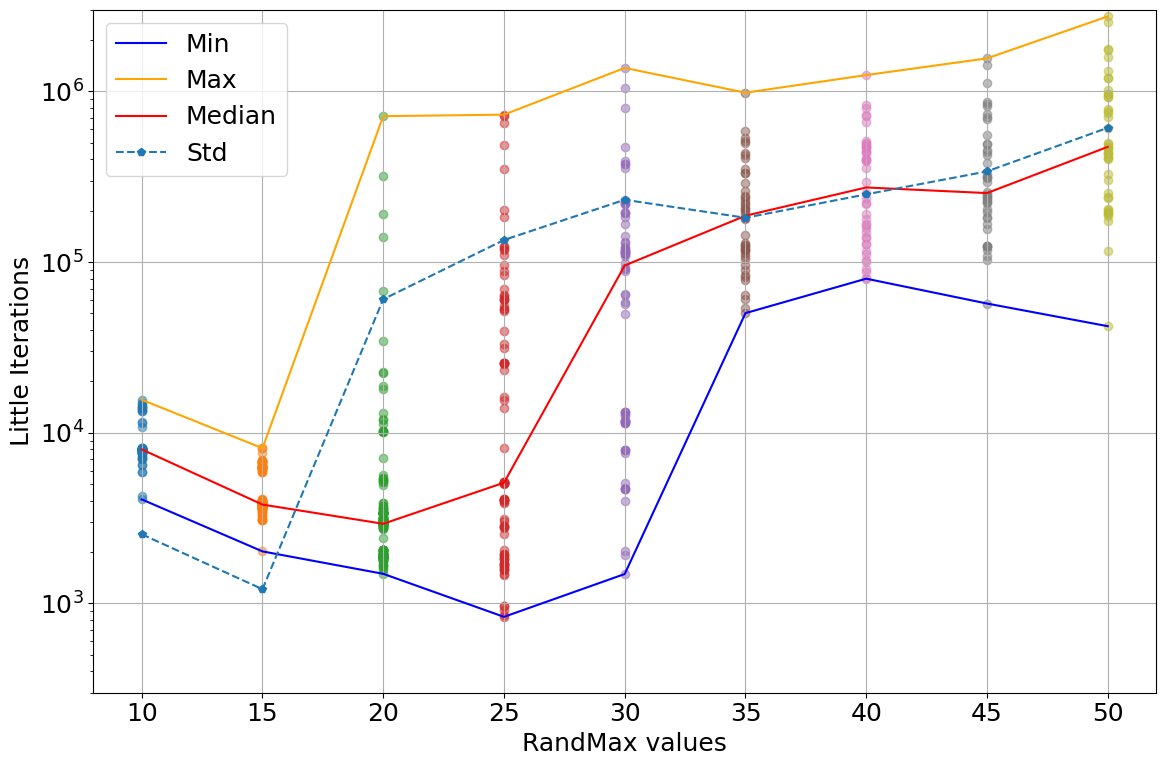

In [69]:
# Define the path to the JSON file
input_file_path = 'last_y_values_70.json'

# Read the data from the JSON file
with open(input_file_path, 'r') as file:
    all_data = json.load(file)

fig, ax = plt.subplots(figsize=(12, 8))

global_min = 300  # Adjusted to avoid log(0)
global_max = 3000000

min_vals = []
max_vals = []
median_vals = []
mean_vals = []
stdl = []

# Plotting
for range_val, values in all_data.items():
    if values:
        range_val = int(range_val)
        x = [range_val] * len(values)
        ax.scatter(x, values, alpha=0.5, label='Data Points' if range_val == list(all_data.keys())[0] else "")
        
        # Statistics
        stats = np.array(values)
        min_val = np.min(stats)
        max_val = np.max(stats)
        median_val = np.median(stats)
        mean_val = np.mean(stats)
        std_val = np.std(stats)
        
        min_vals.append((range_val, min_val))
        max_vals.append((range_val, max_val))
        median_vals.append((range_val, median_val))
        mean_vals.append((range_val, mean_val))
        stdl.append((range_val, std_val))
        
        # Annotation if max value exceeds global_max
        if max_val > global_max:
            ax.text(range_val+1.5, global_max-25, f'^{int(max_val)}', ha='center', color='orange')

# Plotting statistics as lines across the graph
min_vals_x, min_vals_y = zip(*min_vals)
max_vals_x, max_vals_y = zip(*max_vals)
median_vals_x, median_vals_y = zip(*median_vals)
mean_vals_x, mean_vals_y = zip(*mean_vals)
std_vals_x, std_vals_y = zip(*stdl)

ax.plot(min_vals_x, min_vals_y, 'b-', label='Min')
ax.plot(max_vals_x, max_vals_y, 'orange', label='Max')
ax.plot(median_vals_x, median_vals_y, 'r-', label='Median')
# ax.plot(mean_vals_x, mean_vals_y, 'g--', label='Mean')
ax.plot(std_vals_x, std_vals_y, 'p--', label='Std')

# Set logarithmic scale
ax.set_yscale('log')

ax.set_xlabel('RandMax values')
ax.set_ylabel('Little Iterations')
ax.set_xticks([int(key) for key in all_data.keys()])
ax.set_xticklabels([int(key) for key in all_data.keys()])
ax.set_ylim(global_min, global_max)
plt.grid(True)

# Adding legend to the plot
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))  # removing duplicate labels

plt.tight_layout()
plt.legend(by_label.values(), by_label.keys())
plt.show()

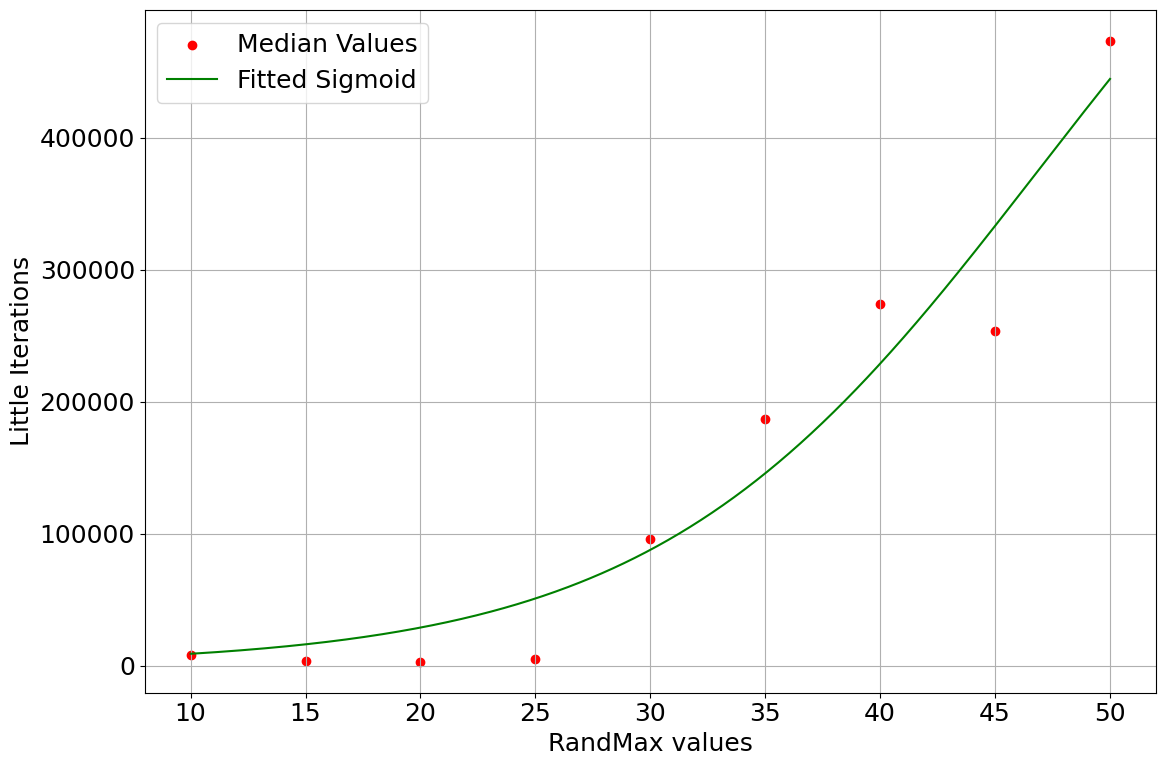

(749634.2807084688,
 46.8586423411014,
 0.11990034867144593,
 0.9367932744272235,
 27.075443821522715)

In [70]:
# Define the sigmoid function
def sigmoid(x, L, x0, k):
    return L / (1 + np.exp(-k * (x - x0)))

# Extract median values from the data
median_vals_x, median_vals_y = zip(*median_vals)

# Initial guess for the parameters L, x0, and k
initial_guess = [max(median_vals_y), np.median(median_vals_x), 1]

# Perform curve fitting
popt, pcov = curve_fit(sigmoid, median_vals_x, median_vals_y, p0=initial_guess)

# Extract the optimal parameters
L_opt, x0_opt, k_opt = popt

# Generate x values for plotting the fitted sigmoid curve
x_values = np.linspace(min(median_vals_x), max(median_vals_x), 500)
fitted_sigmoid = sigmoid(x_values, *popt)

# Calculate predicted values using the sigmoid function
predicted_median_vals_y = sigmoid(median_vals_x, *popt)

# Calculate R-squared value
r_squared = r2_score(median_vals_y, predicted_median_vals_y)

# Calculate RMSE
rmse = (np.sqrt(mean_squared_error(median_vals_y, predicted_median_vals_y))/np.mean(median_vals_y))*100

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))
plt.rcdefaults()
plt.rcParams.update({'font.size': 18})

# Plot original median values
ax.scatter(median_vals_x, median_vals_y, color='r', label='Median Values')

# Plot fitted sigmoid curve
ax.plot(x_values, fitted_sigmoid, label='Fitted Sigmoid', color='g')

# Set logarithmic scale
# ax.set_yscale('log')

ax.set_xlabel('RandMax values')
ax.set_ylabel('Little Iterations')
ax.set_xticks([int(key) for key in all_data.keys()])
ax.set_xticklabels([int(key) for key in all_data.keys()])
# ax.set_ylim(global_min, global_max)
plt.grid(True)

# Adding legend to the plot
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))  # removing duplicate labels

plt.tight_layout()
plt.legend(by_label.values(), by_label.keys())
plt.show()

# Display the fitted sigmoid parameters and goodness of fit metrics
L_opt, x0_opt, k_opt, r_squared, rmse

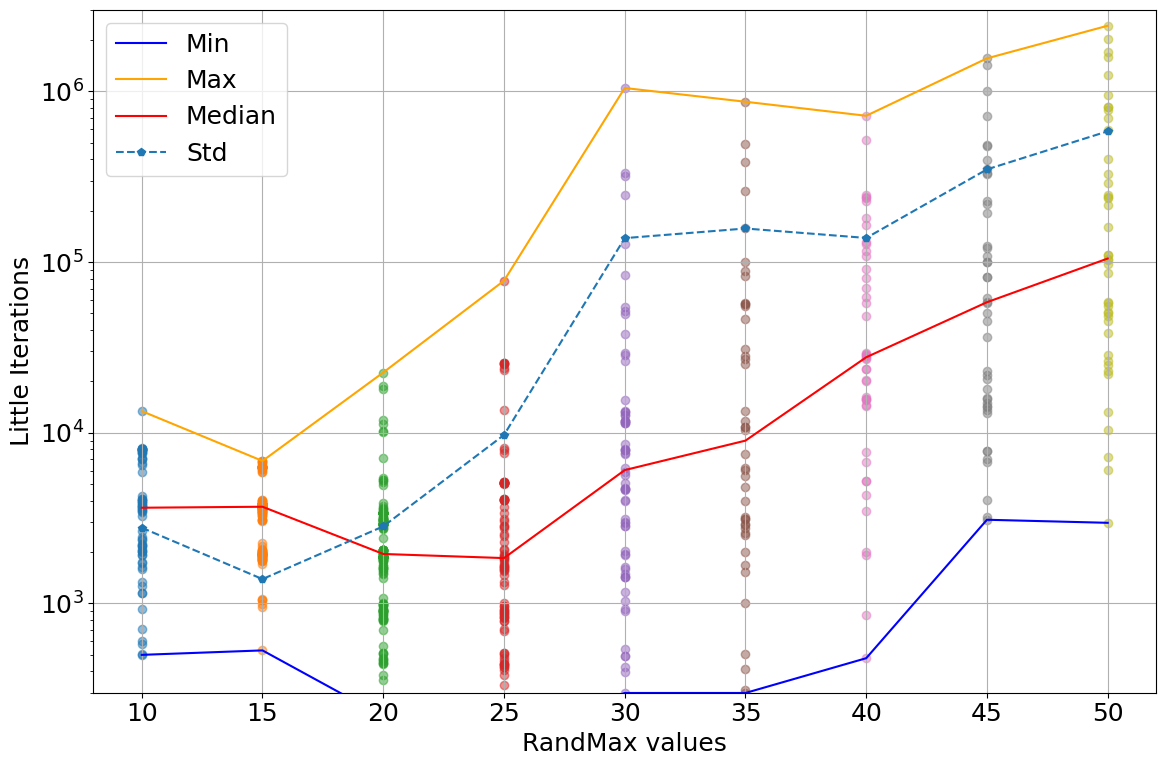

In [71]:
# Define the path to the JSON file
input_file_path = 'easy_y_values_wstd_70.json'

# Read the data from the JSON file
with open(input_file_path, 'r') as file:
    all_data = json.load(file)

fig, ax = plt.subplots(figsize=(12, 8))

global_min = 300  # Adjusted to avoid log(0)
global_max = 3000000

min_vals = []
max_vals = []
median_vals = []
mean_vals = []
stdl = []

# Plotting
for range_val, values in all_data.items():
    values = values[0]
    if values:
        range_val = int(range_val)
        x = [range_val] * len(values)
        ax.scatter(x, values, alpha=0.5, label='Data Points' if range_val == list(all_data.keys())[0] else "")
        
        # Statistics
        stats = np.array(values)
        min_val = np.min(stats)
        max_val = np.max(stats)
        median_val = np.median(stats)
        mean_val = np.mean(stats)
        std_val = np.std(stats)
        
        min_vals.append((range_val, min_val))
        max_vals.append((range_val, max_val))
        median_vals.append((range_val, median_val))
        mean_vals.append((range_val, mean_val))
        stdl.append((range_val, std_val))
        
        # Annotation if max value exceeds global_max
        if max_val > global_max:
            ax.text(range_val+1.5, global_max-25, f'^{int(max_val)}', ha='center', color='orange')

# Plotting statistics as lines across the graph
min_vals_x, min_vals_y = zip(*min_vals)
max_vals_x, max_vals_y = zip(*max_vals)
median_vals_x, median_vals_y = zip(*median_vals)
mean_vals_x, mean_vals_y = zip(*mean_vals)
std_vals_x, std_vals_y = zip(*stdl)

ax.plot(min_vals_x, min_vals_y, 'b-', label='Min')
ax.plot(max_vals_x, max_vals_y, 'orange', label='Max')
ax.plot(median_vals_x, median_vals_y, 'r-', label='Median')
# ax.plot(mean_vals_x, mean_vals_y, 'g--', label='Mean')
ax.plot(std_vals_x, std_vals_y, 'p--', label='Std')

# Set logarithmic scale
ax.set_yscale('log')

ax.set_xlabel('RandMax values')
ax.set_ylabel('Little Iterations')
ax.set_xticks([int(key) for key in all_data.keys()])
ax.set_xticklabels([int(key) for key in all_data.keys()])
ax.set_ylim(global_min, global_max)
plt.grid(True)

# Adding legend to the plot
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))  # removing duplicate labels

plt.tight_layout()
plt.legend(by_label.values(), by_label.keys())
plt.show()

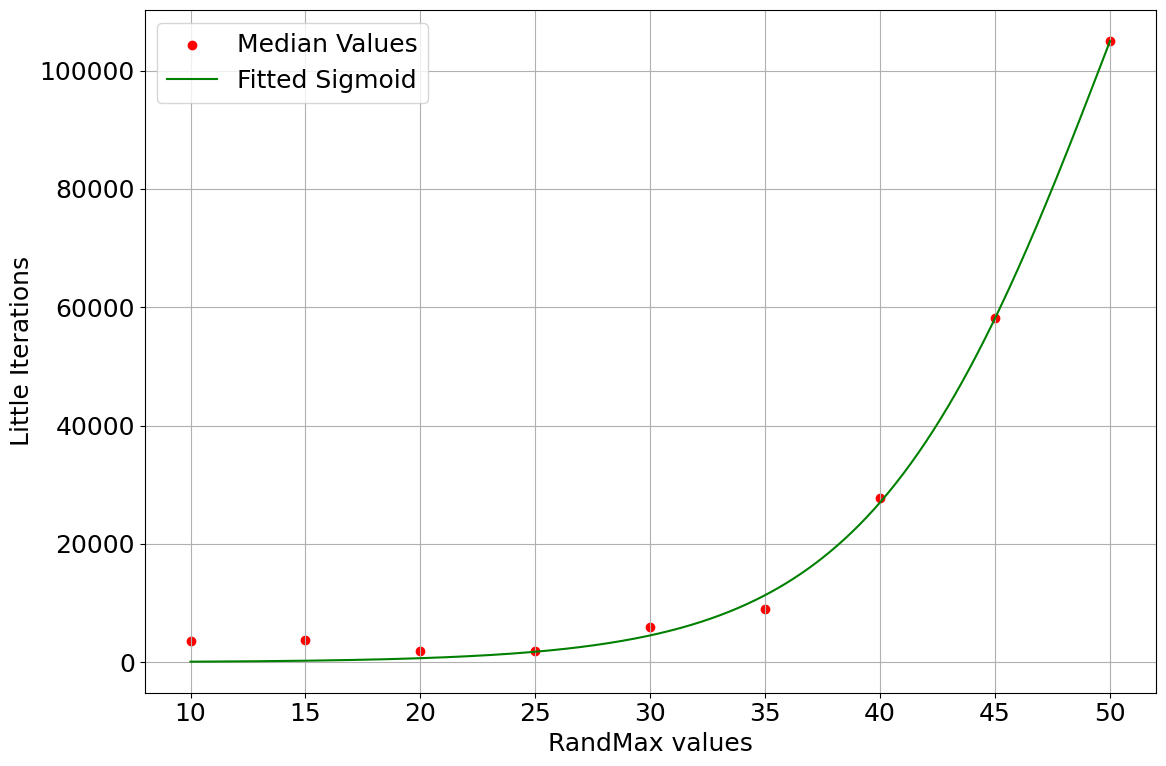

(214142.06989063876,
 50.204578861473706,
 0.18956078229308795,
 0.9966294908551337,
 8.060455005989253)

In [72]:
# Define the sigmoid function
def sigmoid(x, L, x0, k):
    return L / (1 + np.exp(-k * (x - x0)))

# Extract median values from the data
median_vals_x, median_vals_y = zip(*median_vals)

# Initial guess for the parameters L, x0, and k
initial_guess = [max(median_vals_y), np.median(median_vals_x), 1]

# Perform curve fitting
popt, pcov = curve_fit(sigmoid, median_vals_x, median_vals_y, p0=initial_guess)

# Extract the optimal parameters
L_opt, x0_opt, k_opt = popt

# Generate x values for plotting the fitted sigmoid curve
x_values = np.linspace(min(median_vals_x), max(median_vals_x), 500)
fitted_sigmoid = sigmoid(x_values, *popt)

# Calculate predicted values using the sigmoid function
predicted_median_vals_y = sigmoid(median_vals_x, *popt)

# Calculate R-squared value
r_squared = r2_score(median_vals_y, predicted_median_vals_y)

# Calculate RMSE
rmse = (np.sqrt(mean_squared_error(median_vals_y, predicted_median_vals_y))/np.mean(median_vals_y))*100

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))
plt.rcdefaults()
plt.rcParams.update({'font.size': 18})

# Plot original median values
ax.scatter(median_vals_x, median_vals_y, color='r', label='Median Values')

# Plot fitted sigmoid curve
ax.plot(x_values, fitted_sigmoid, label='Fitted Sigmoid', color='g')

# Set logarithmic scale
# ax.set_yscale('log')

ax.set_xlabel('RandMax values')
ax.set_ylabel('Little Iterations')
ax.set_xticks([int(key) for key in all_data.keys()])
ax.set_xticklabels([int(key) for key in all_data.keys()])
# ax.set_ylim(global_min, global_max)
plt.grid(True)

# Adding legend to the plot
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))  # removing duplicate labels

plt.tight_layout()
plt.legend(by_label.values(), by_label.keys())
plt.show()

# Display the fitted sigmoid parameters and goodness of fit metrics
L_opt, x0_opt, k_opt, r_squared, rmse

In [73]:
def load_data(file_path):
    with open(file_path, 'r') as file:
        return json.load(file)

def calculate_median_differences(file1, file2):
    data1 = load_data(file1)
    data2 = load_data(file2)

    medians1 = {int(k): np.median(v[0]) for k, v in data1.items() if v[0]}
    medians2 = {int(k): np.median(v[0]) for k, v in data2.items() if v[0]}
    
    differences = []
    
    for key in medians1.keys():
        if key in medians2:
            diff = medians2[key] - medians1[key]
            differences.append(diff)
    
    return np.mean(differences)

ending_numbers = [30, 50, 70]
results = {}

for number in ending_numbers:
    file1 = f'last_y_values_{number}.json'
    file2 = f'easy_y_values_wstd_{number}.json'
    avg_diff = calculate_median_differences(file1, file2)
    results[number] = avg_diff

results

{30: -79124.94444444444, 50: -162184.0, 70: -87958.72222222222}

In [74]:
def calculate_percentage_median_differences(file1, file2):
    data1 = load_data(file1)
    data2 = load_data(file2)

    medians1 = {int(k): np.median(v[0]) for k, v in data1.items() if v[0]}
    medians2 = {int(k): np.median(v[0]) for k, v in data2.items() if v[0]}
    
    percentage_differences = []
    
    for key in medians1.keys():
        if key in medians2:
            if medians1[key] != 0:
                percentage_diff = ((medians2[key] - medians1[key]) / medians1[key]) * 100
                percentage_differences.append(percentage_diff)
    
    return np.mean(percentage_differences)

ending_numbers = [30, 50, 70]
results = {}

for number in ending_numbers:
    file1 = f'last_y_values_{number}.json'
    file2 = f'easy_y_values_wstd_{number}.json'
    avg_percentage_diff = calculate_percentage_median_differences(file1, file2)
    results[number] = avg_percentage_diff

results


{30: -96.54518857439976, 50: -86.03582826911844, 70: -71.46164045177154}